# Data Scientist Job Salaries

### Data Scientist Job Salaries dataset contains:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('DS_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.shape

(607, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


having any missing values?

In [6]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Looks great! There is no null values in this dataset,
let's do our cleaning.

## Data Cleaning

In [7]:
df.drop(columns=['Unnamed: 0', 'salary'] , axis = 1, inplace = True)

#### Replacing values of 'Experience level' and 'Remote Ratio' to be more readable

In [8]:
df['experience_level'].replace(['EN','MI', 'SE', 'EX'] , ['Entry/junior', 'Mid/Intermediate', 'Senior/Expert' , 'Executive/Director'] , inplace = True)

In [9]:
df['remote_ratio'].replace([0 , 50 , 100] , ['on_Site' , 'Hybrid', 'Remote'], inplace = True)

In [10]:
df['employment_type'].replace(['FT', 'PT', 'CT', 'FL'] , ['Full Time' , 'Part Time', 'Contract', 'Freelance'] , inplace = True)

In [11]:
df['company_size'].replace(['L' , 'M' , 'S'], ['Large' , 'Medium' , 'Small'] , inplace = True)

In [12]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid/Intermediate,Full Time,Data Scientist,EUR,79833,DE,on_Site,DE,Large
1,2020,Senior/Expert,Full Time,Machine Learning Scientist,USD,260000,JP,on_Site,JP,Small
2,2020,Senior/Expert,Full Time,Big Data Engineer,GBP,109024,GB,Hybrid,GB,Medium
3,2020,Mid/Intermediate,Full Time,Product Data Analyst,USD,20000,HN,on_Site,HN,Small
4,2020,Senior/Expert,Full Time,Machine Learning Engineer,USD,150000,US,Hybrid,US,Large


## Exploratory Data Analysis

###  1. Work Year

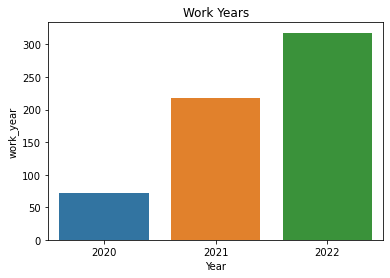

In [13]:

ax = sns.barplot(x = df['work_year'].value_counts().index , y = df['work_year'].value_counts())
ax.set(title = 'Work Years' , xlabel = 'Year' )
plt.show()     

### 2. Experience Level

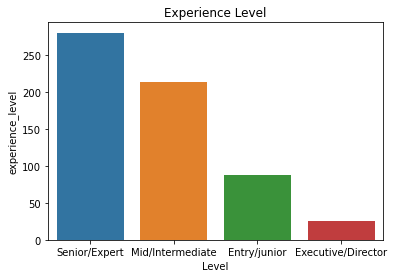

In [14]:
ax = sns.barplot(x = df['experience_level'].value_counts().index , y = df['experience_level'].value_counts())
ax.set(title = 'Experience Level' , xlabel = 'Level' )
plt.show()   

### 3. Employment Type

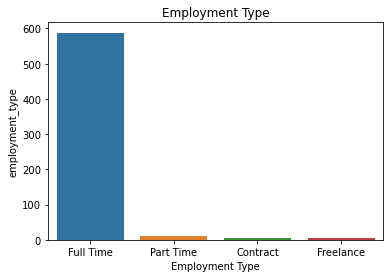

In [15]:
ax = sns.barplot(x = df['employment_type'].value_counts().index , y = df['employment_type'].value_counts())
ax.set(title = 'Employment Type' , xlabel = 'Employment Type' )
plt.show()   

In [16]:
types = df['employment_type'].value_counts()
types

Full Time    588
Part Time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64

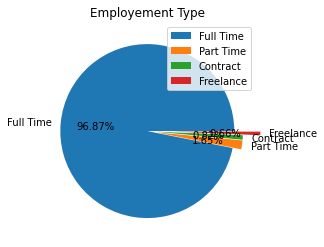

In [17]:
plt.figure(figsize=plt.figaspect(1))
explode = [0,0.1,0.1, 0.3]
plt.pie(x = types.values,labels =types.index,autopct='%1.2f%%',explode = explode )
plt.title('Employement Type')
plt.legend()
plt.show()

### 4. Job Title

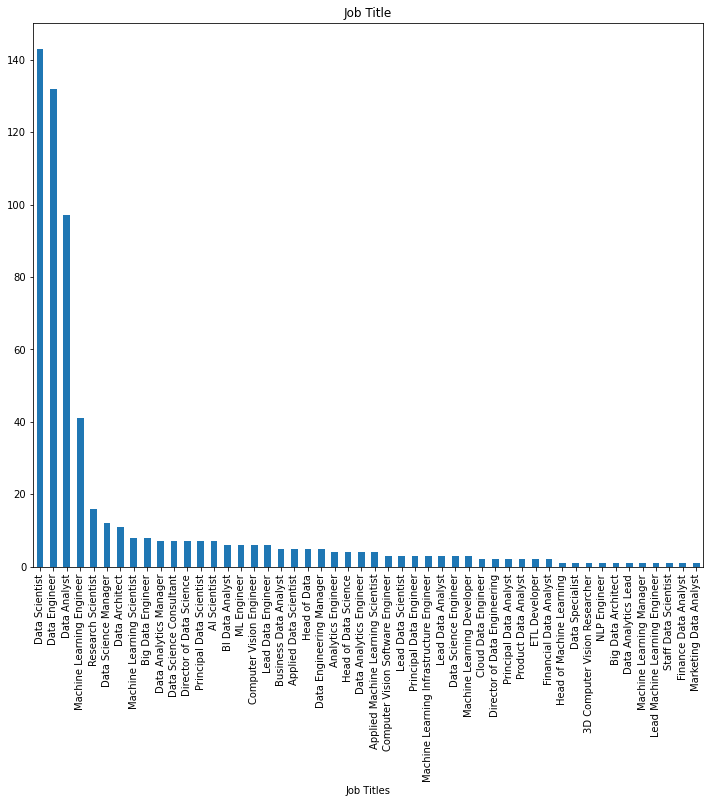

In [18]:

df['job_title'].value_counts().plot(kind = 'bar' , title = 'Job Title' , xlabel = 'Job Titles' , figsize = (12,10) )
plt.show()

In [19]:
jobs = df.groupby('job_title').size().reset_index().sort_values(by=0,ascending = False)
jobs.head()

,job_title,0
22,Data Scientist,143
17,Data Engineer,132
12,Data Analyst,97
38,Machine Learning Engineer,41
48,Research Scientist,16


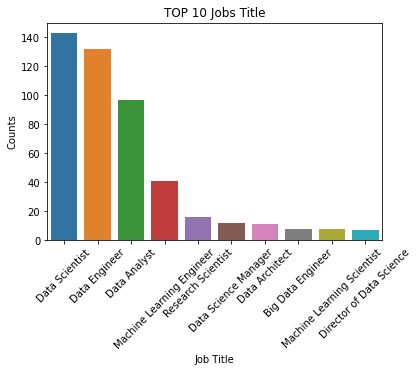

In [20]:
figsize = (12,10)
sns.barplot(x= 'job_title', y=0, data = jobs[:10])
plt.title('TOP 10 Jobs Title')
plt.xlabel('Job Title')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
plt.show()

### 5. Remote Ratio

In [21]:
ratio = df['remote_ratio'].value_counts()
ratio

Remote     381
on_Site    127
Hybrid      99
Name: remote_ratio, dtype: int64

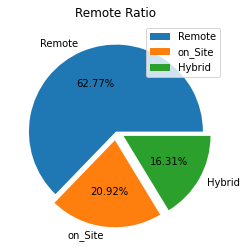

In [22]:
explode = [0,0.1,0.1]
plt.pie(x = ratio.values,labels =ratio.index,autopct='%1.2f%%',explode = explode )
plt.title('Remote Ratio')
plt.legend()
plt.show()

### 6. Company Size

In [23]:
size = df['company_size'].value_counts()
size

Medium    326
Large     198
Small      83
Name: company_size, dtype: int64

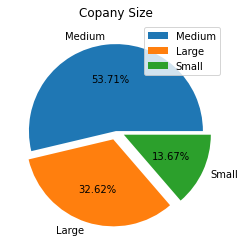

In [24]:
explode = [0,0.1,0.1]
plt.pie(x = size.values,labels =size.index,autopct='%1.2f%%',explode = explode )
plt.title('Copany Size')
plt.legend()
plt.show()

### 7. Salary in USD

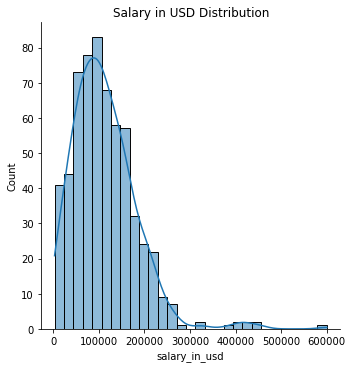

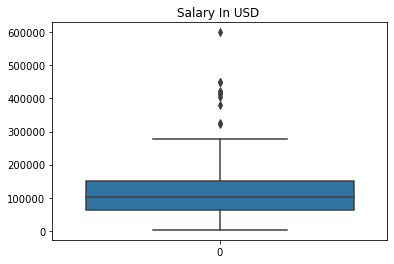

In [25]:
sns.displot(data= df['salary_in_usd'], kde = True).set(title= 'Salary in USD Distribution')
plt.show()

sns.boxplot(data= df['salary_in_usd']).set(title = 'Salary In USD ')
plt.show()

In [26]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pycountry

In [28]:
resi_country_list = []
comp_country_list = []
for country_code in df.employee_residence:
    resi_country_list.append(pycountry.countries.get(alpha_2=country_code).name)

for country_code in df.company_location:
    comp_country_list.append(pycountry.countries.get(alpha_2=country_code).name)

df['employee_residence'] = resi_country_list
df['company_location'] = comp_country_list

In [29]:
df

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid/Intermediate,Full Time,Data Scientist,EUR,79833,Germany,on_Site,Germany,Large
1,2020,Senior/Expert,Full Time,Machine Learning Scientist,USD,260000,Japan,on_Site,Japan,Small
2,2020,Senior/Expert,Full Time,Big Data Engineer,GBP,109024,United Kingdom,Hybrid,United Kingdom,Medium
3,2020,Mid/Intermediate,Full Time,Product Data Analyst,USD,20000,Honduras,on_Site,Honduras,Small
4,2020,Senior/Expert,Full Time,Machine Learning Engineer,USD,150000,United States,Hybrid,United States,Large
...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior/Expert,Full Time,Data Engineer,USD,154000,United States,Remote,United States,Medium
603,2022,Senior/Expert,Full Time,Data Engineer,USD,126000,United States,Remote,United States,Medium
604,2022,Senior/Expert,Full Time,Data Analyst,USD,129000,United States,on_Site,United States,Medium
605,2022,Senior/Expert,Full Time,Data Analyst,USD,150000,United States,Remote,United States,Medium


### 8. Company Location

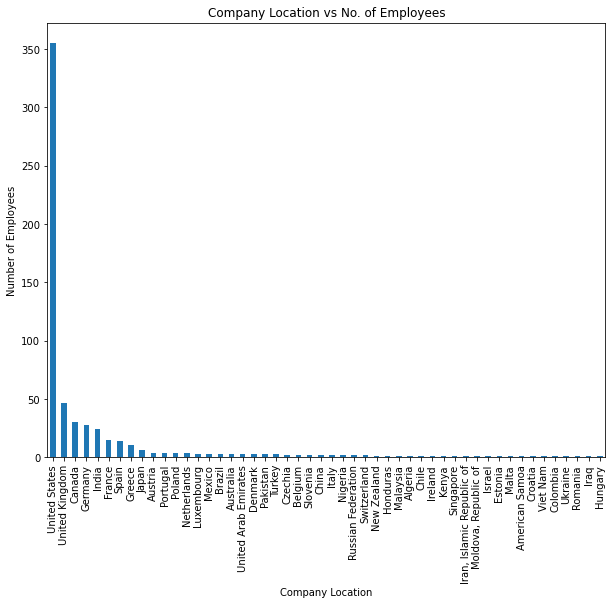

In [35]:
df['company_location'].value_counts().plot(kind='bar', title='Company Location vs No. of Employees', xlabel='Company Location',
ylabel='Number of Employees', figsize=(10,8))
plt.show()

In [37]:
Location = df['company_location'].value_counts()
Location

United States                355
United Kingdom                47
Canada                        30
Germany                       28
India                         24
France                        15
Spain                         14
Greece                        11
Japan                          6
Austria                        4
Portugal                       4
Poland                         4
Netherlands                    4
Luxembourg                     3
Mexico                         3
Brazil                         3
Australia                      3
United Arab Emirates           3
Denmark                        3
Pakistan                       3
Turkey                         3
Czechia                        2
Belgium                        2
Slovenia                       2
China                          2
Italy                          2
Nigeria                        2
Russian Federation             2
Switzerland                    2
New Zealand                    1
Honduras  

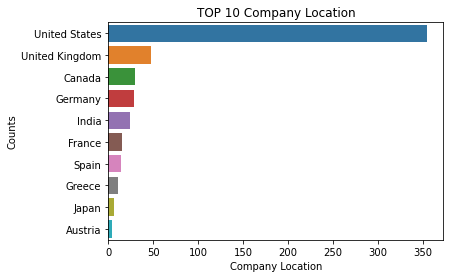

In [43]:
figsize = (12,10)
sns.barplot(x = Location.values[:10],y = Location.index[:10])
plt.title('TOP 10 Company Location')
plt.xlabel('Company Location')
plt.ylabel('Counts')
plt.show()

Text(0.5, 1.0, 'Average salary over the year')

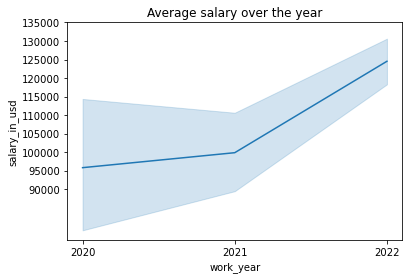

In [50]:
sns.lineplot(x= "work_year", y= "salary_in_usd" , data = df );

plt.xticks(df["work_year"].unique());
plt.yticks(np.arange(90000,140000,5000));
plt.title("Average salary over the year")

               work_year  salary_in_usd
work_year       1.000000       0.170493
salary_in_usd   0.170493       1.000000


<AxesSubplot:>

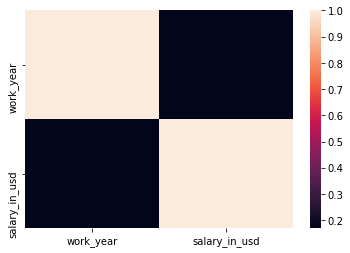

In [54]:
print(df.corr())
sns.heatmap(df.corr())

In [51]:
df.to_csv('salaries.csv')

In [53]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

#### Correlation

               work_year  salary_in_usd
work_year       1.000000       0.170493
salary_in_usd   0.170493       1.000000


<AxesSubplot:>

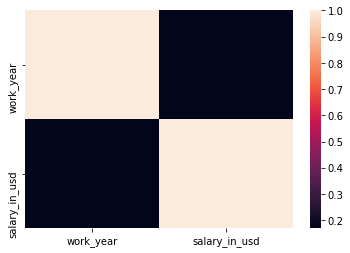

In [56]:
print(df.corr())
sns.heatmap(df.corr())